In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA


In [2]:
data=np.load('./DATA/data_pca_50_y_mean.pickle.npz')

In [3]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
X=data['arr_0']
Y=data['arr_1']
mean=data['arr_2']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((306, 50), (132, 50), (306,), (132,))

## Training a Machine Learning Model

In [7]:
from sklearn.svm import SVC

In [8]:
model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [9]:
model.fit(x_train,y_train)
print("model trained successfully")

model trained successfully


In [10]:
#score
model.score(x_train,y_train)

0.8202614379084967

In [11]:
#score
model.score(x_test,y_test)

0.7727272727272727

## Model Evaluation
- Confusion Metrics
- Clasification Report
- Kappa Score
- AUC and ROC (probablity)

In [12]:
from sklearn import metrics

In [13]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test) # probablity

In [14]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[96,  0, 96],
       [30,  6, 36]], dtype=int64)

In [15]:
cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True )

In [16]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.761905,1.000000,0.864865,96.000000
female,1.000000,0.166667,0.285714,36.000000
accuracy,0.772727,0.772727,0.772727,0.772727
macro avg,0.880952,0.583333,0.575290,132.000000
weighted avg,0.826840,0.772727,0.706915,132.000000


In [17]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.22535211267605648

## ROC AND AUC

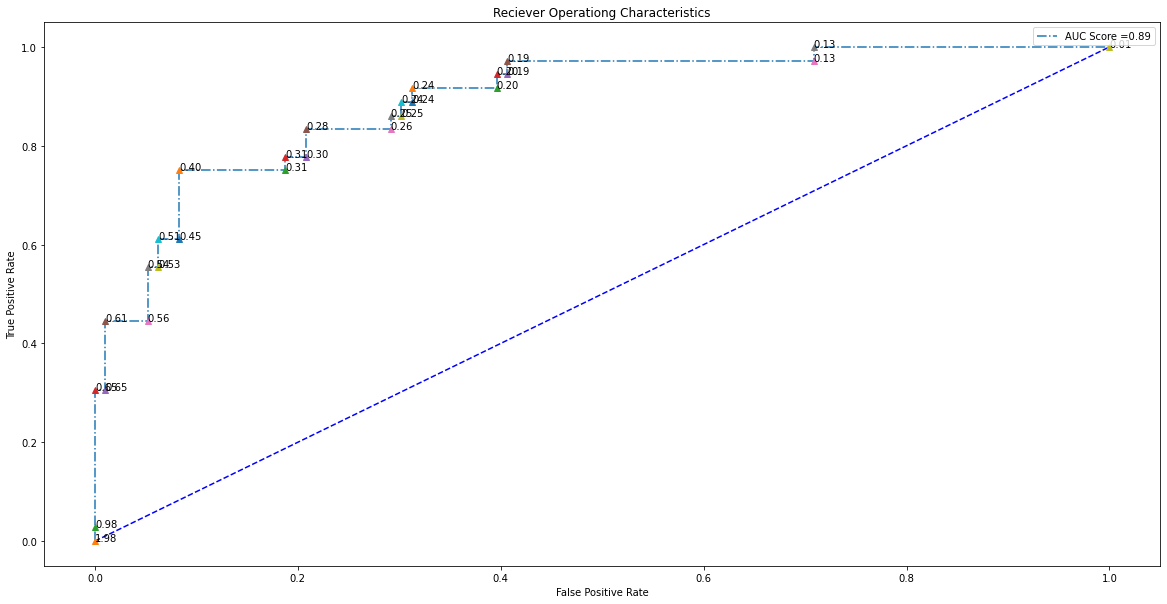

In [19]:
# roc for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresh)):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
plt.legend(['AUC Score =%0.2f'%auc_s])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operationg Characteristics')
plt.show()

# HYPER PARAMETER TUNING

In [20]:
model_tune=SVC()

In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
param_grid={
    'C':[1,10,20,30,50,100],
    'kernel':['rbf','poly'],
    'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
    'coef0':[0,1],
}

In [26]:
model_grid=GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [28]:
model_grid.fit(X,Y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   14.5s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [30]:
model_grid.best_index_

32

In [31]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

In [32]:
model_grid.best_score_

0.8103709508881923

In [37]:
# With best parametter build ML model
model_best=SVC(C=10,kernel='rbf',gamma=0.002,coef0=0,probability=True)

In [38]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8409090909090909

## Model Evaluation
- Confusion Metrics
- Clasification Report
- Kappa Score
- AUC and ROC (probablity)

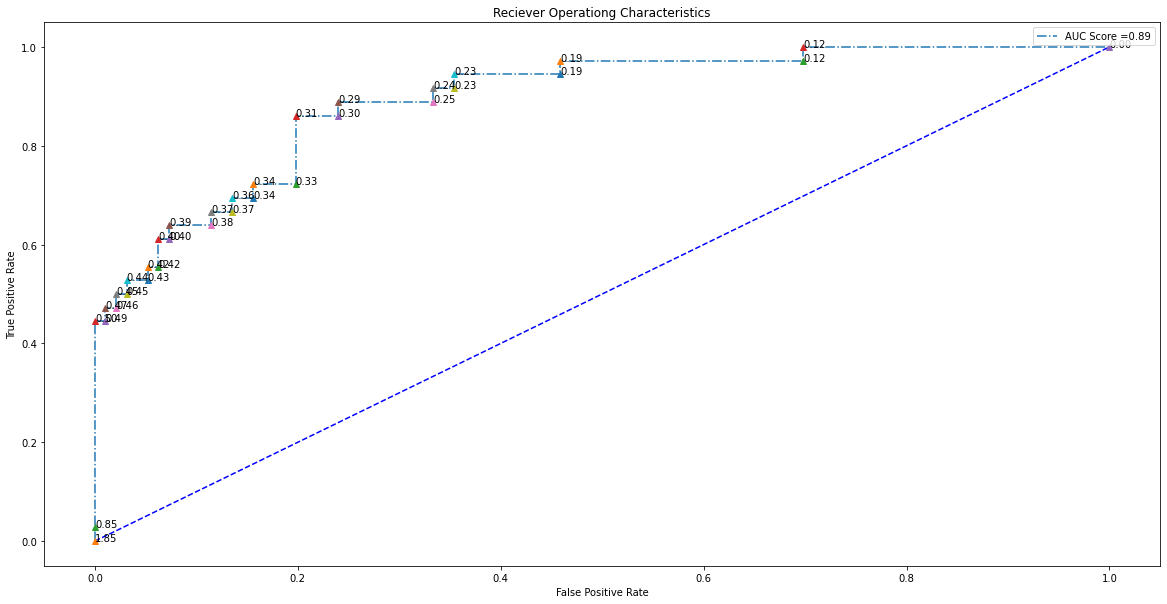

In [39]:


from sklearn import metrics

y_pred=model_best.predict(x_test)
y_prob=model_best.predict_proba(x_test) # probablity

cm=metrics.confusion_matrix(y_test,y_pred)
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True )

pd.DataFrame(cr).T

# kappa
metrics.cohen_kappa_score(y_test,y_pred)

## ROC AND AUC

# roc for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(20,10))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresh)):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
plt.legend(['AUC Score =%0.2f'%auc_s])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operationg Characteristics')
plt.show()

In [40]:
#saving our machine learning model
import pickle
pickle.dump(model_best,open('model_svm.pickle','wb'))
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))